In [13]:
#Copying images to training, validation, and test directories
import os, shutil
original_dataset_dir = '/content/drive/My Drive/ani/train'
# creating our main directoring
base_dir = '/content/drive/My Drive/ani/cats_and_dogs_small'
os.mkdir(base_dir)

#Directories for the training,validation, andtest splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

#Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
#Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
#Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
#Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
#Directory with test cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
##Directory with training cat pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

#Copies the first 1,000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(0,1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)

#Copies the next 500 cat images to validation_cats_di
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src, dst)

#Copies the next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)

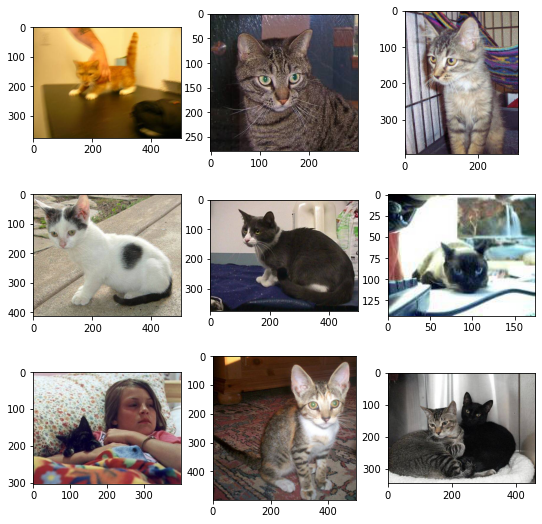

In [4]:
train_cats_dir = '/content/drive/My Drive/ani/cats_and_dogs_small/train/cats'
#plotting the cats data from the train_set
import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib.image import imread
plt.figure(figsize= (9,9))
for i in range(9):
  #defining the subplot
  plt.subplot(330 + 1 + i)
  image_name = train_cats_dir + '/cat.'+ str(i)+ '.jpg'
  #loading the image
  image = imread(image_name)
  #plotting the image
  plt.imshow(image)


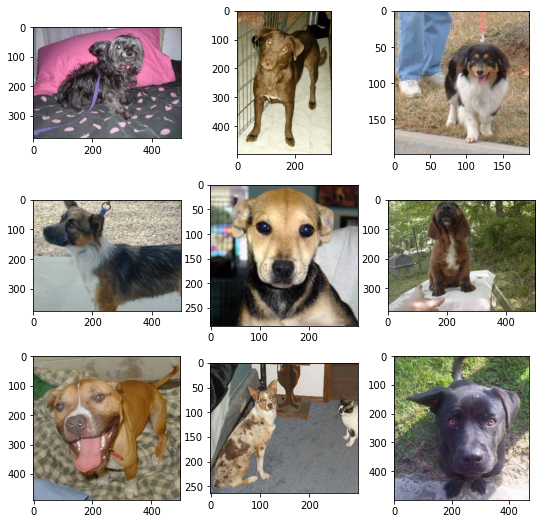

In [3]:
train_dogs_dir = '/content/drive/My Drive/ani/cats_and_dogs_small/train/dogs'
#plotting the dogs data from the train_set
import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib.image import imread
plt.figure(figsize= (9,9))
for i in range(9):
  #defining the subplot
  plt.subplot(330 + 1 + i)
  image_name = train_dogs_dir + '/dog.'+ str(i)+ '.jpg'
  #loading the image
  image = imread(image_name)
  #plotting the image
  plt.imshow(image)


In [8]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,MaxPooling2D,Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop
#Instantiating a small convnet for dogs vs. cats classification
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

print(model.summary())
train_dir = '/content/drive/My Drive/ani/cats_and_dogs_small/train'
validation_dir = '/content/drive/My Drive/ani/cats_and_dogs_small/validation'
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

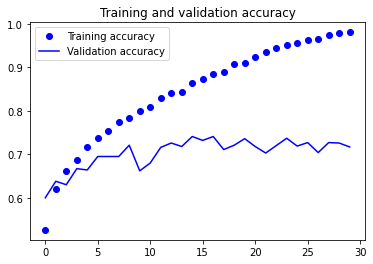

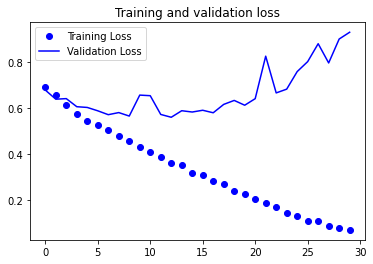

In [9]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

<!-- 
# These plots showa that our model is clearly overfitting. The training accuracy increases linearly over time, until it reaches nearly 100%, whiles the validation accuracy stalls at 70–72%.
The validation loss reaches its minimum after only five epochs and then stalls, whereas, the training loss keeps decreasing linearly until it reaches nearly 0.
Because you have relatively few training samples , techniques that can help
#mitigate overfitting, such as dropout and weight decay (L2 regularization).and data augmentation espeially when it comes to computer vision .Data augmentationtakes the approach of generating more training data from existing training samples.
ImageGenerator instance is used for the data augumantation process. There are properties on it that you can use to augment the image
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')
These are just a few of the options available (for more, see the Keras documentation).
Let’s quickly go over this code:
 rotation_range is a value in degrees (0–180), a range within which to randomly
rotate pictures.
 width_shift and height_shift are ranges (as a fraction of total width or
height) within which to randomly translate pictures vertically or horizontally.
 shear_range is for randomly applying shearing transformations.
 zoom_range is for randomly zooming inside pictures.
 horizontal_flip is for randomly flipping half the images horizontally—relevant
when there are no assumptions of horizontal asymmetry (for example,
real-world pictures).
 fill_mode is the strategy used for filling in newly created pixels, which can
appear after a rotation or a width/height shift. *italicized text* -

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,MaxPooling2D,Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop
#Instantiating a small convnet for dogs vs. cats classification
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

print(model.summary())
train_dir = '/content/drive/My Drive/ani/cats_and_dogs_small/train'
validation_dir = '/content/drive/My Drive/ani/cats_and_dogs_small/validation'
# All images will be rescaled by 1./255
train_datagen = train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)      

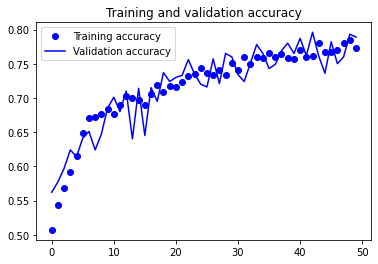

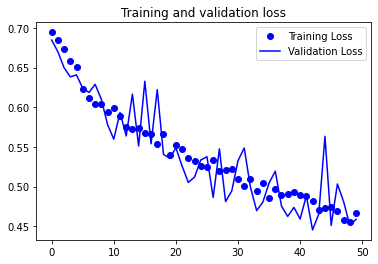

In [12]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Let's try to improve our model further by adding a dropout layer. This layer helps us to avoid our model from being overfitted.

In [72]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,MaxPooling2D,Flatten,Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop
#Instantiating a small convnet for dogs vs. cats classification
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer=RMSprop(lr=1e-4),
metrics=['acc'])

print(model.summary())
train_dir = '/content/drive/My Drive/ani/cats_and_dogs_small/train'
validation_dir = '/content/drive/My Drive/ani/cats_and_dogs_small/validation'
# All images will be rescaled by 1./255
train_datagen = train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 15, 15, 128)     

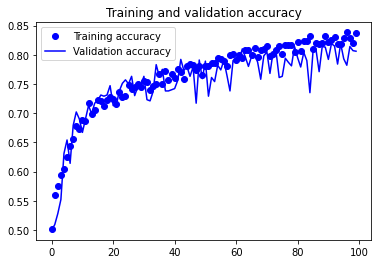

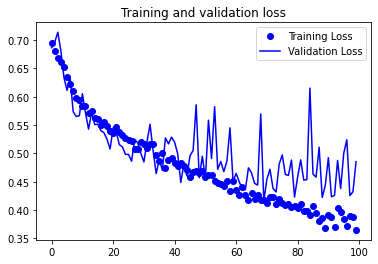

In [73]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [74]:
eval_datagen = ImageDataGenerator(rescale=1./255)
eval_dir = '/content/drive/My Drive/ani/cats_and_dogs_small/test'
eval_generator = eval_datagen.flow_from_directory(
        eval_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')
model.evaluate(eval_generator)

Found 1000 images belonging to 2 classes.
32/32 [==============================] - 3s 102ms/step - loss: 0.4919 - acc: 0.8090


[0.49189189076423645, 0.8090000152587891]

Visualizing Intermediate Representations.... Visualizing intermediate activations consists of displaying the feature maps that are
output by various convolution and pooling layers in a network, given a certain input.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in true_divide


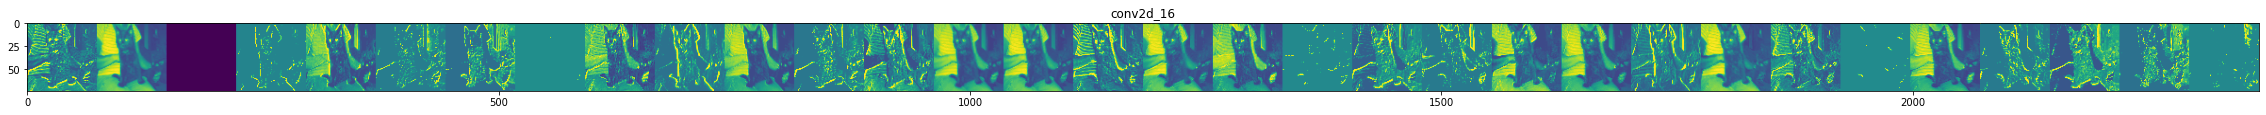

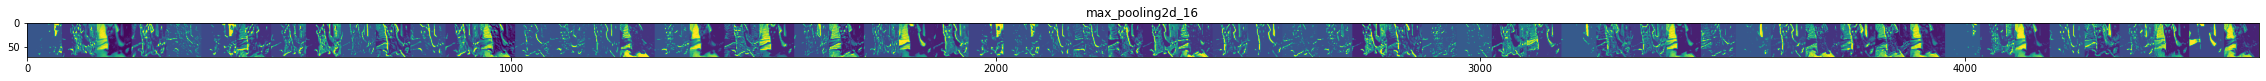

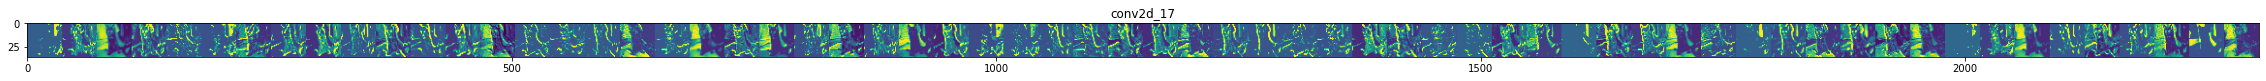

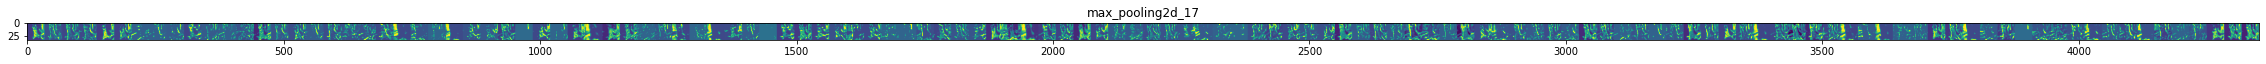

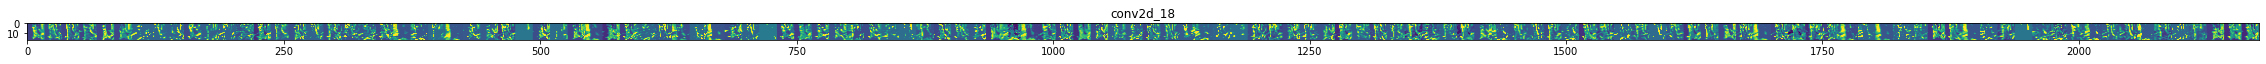

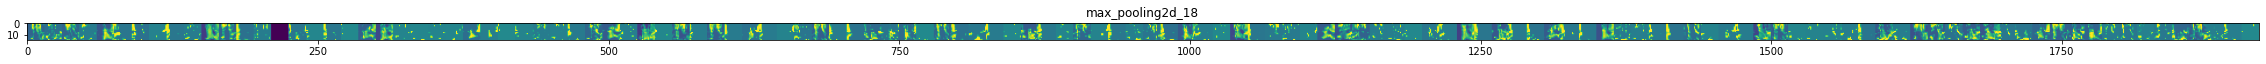

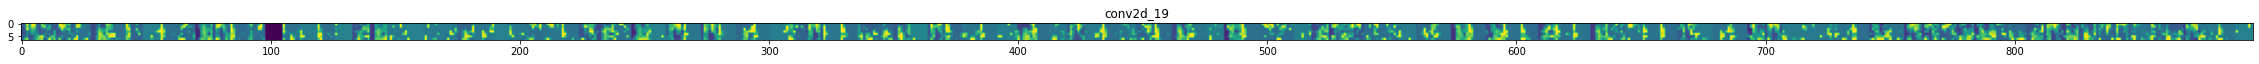

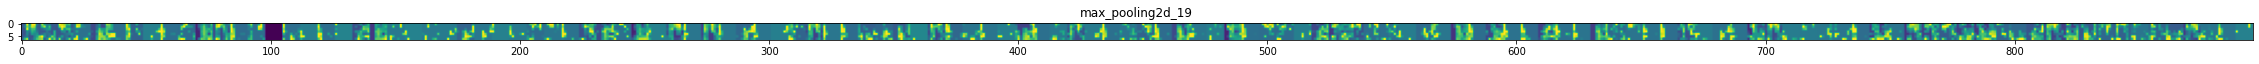

In [16]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from keras.models import Model
import os
import matplotlib.pyplot as plt


train_cat_names = os.listdir('/content/drive/My Drive/ani/cats_and_dogs_small/train/cats')
train_dog_names = os.listdir('/content/drive/My Drive/ani/cats_and_dogs_small/train/dogs')
# Defining a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model =Model(inputs = model.input, outputs = successive_outputs)
# Preparing a random input image from the training set.
train_cats_dir = '/content/drive/My Drive/ani/cats_and_dogs_small/train/cats'
train_dogs_dir = '/content/drive/My Drive/ani/cats_and_dogs_small/train/dogs'
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_names]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_names]
img_path = random.choice(cat_img_files + dog_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Grid Display
    scale = 40. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

(1, 150, 150, 3)
(1, 74, 74, 32)


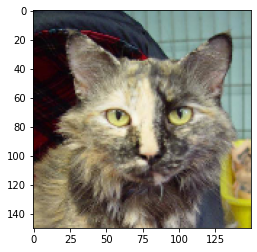

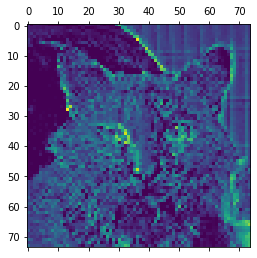

In [27]:
img_path = '/content/drive/My Drive/ani/cats_and_dogs_small/train/cats/cat.10.jpg'
from keras.preprocessing import image
from keras.models import Model
import numpy as np
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape)
plt.imshow(img_tensor[0])


successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model =Model(inputs = model.input, outputs = successive_outputs)
successive_feature_maps = visualization_model.predict(img_tensor)
# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
first_layer_activation = successive_feature_maps [0]
print(first_layer_activation.shape)
plt.matshow(first_layer_activation[0, :, :, 25], cmap='viridis')

Make predictions on new images

In [77]:
model.save('cats_and_dogs_small_2.h5')
from keras.models import load_model
loaded_model = load_model('cats_and_dogs_small_2.h5')